In [3]:

# cd to the folder in drive where this file is present
%cd drive/My\ Drive/MinorProject/Mask_RCNN/samples/satellite/

/content/drive/My Drive/MinorProject/Mask_RCNN/samples/satellite


In [4]:

%ls

'Copy of satellite.py'             inspect_satellite_model.ipynb   satellite.py
 inspect_entire_delhi_data.ipynb   __pycache__/
 inspect_satellite_data.ipynb      satellite.ipynb


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:


import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")
print(ROOT_DIR)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

/content/drive/My Drive/MinorProject/Mask_RCNN


In [6]:
# Import Mask RCNN
sys.path.append(ROOT_DIR+"/mrcnn/")
import utils
import visualize
from visualize import display_images
import model as modellib
from model import log

import satellite

%matplotlib inline

Using TensorFlow backend.


/content/drive/My Drive/MinorProject/Mask_RCNN/samples/satellite
/content/drive/My Drive/MinorProject/Mask_RCNN
/content/drive/My Drive/MinorProject/Mask_RCNN/mask_rcnn_coco.h5
/content/drive/My Drive/MinorProject/Mask_RCNN/logs


In [0]:

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
BALLON_WEIGHTS_PATH = "/path/to/mask_rcnn_balloon.h5"  # TODO: update this pathggc

In [0]:
config = satellite.SatelliteConfig()
SATELLITE_DIR = os.path.join(ROOT_DIR, "datasets/")


In [9]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # DETECTION_MIN_CONFIDENCE = 0.7
    # DETECTION_MAX_INSTANCES = 5
    # DETECTION_NMS_THRESHOLD = 0.3
    IMAGE_MAX_DIM = 512
    IMAGE_MIN_DIM = 512 

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [0]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [0]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [12]:
#LOAD MODEL

# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
    

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [13]:
# Set weight files path

# Set path to satellite weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
# weights_path = "/path/to/mask_rcnn_balloon.h5"

# Or, load the last model you trained
# weights_path = model.find_last()
weights_path = '/content/drive/My Drive/MinorProject/Mask_RCNN/logs/test/weights512x512.h5'

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /content/drive/My Drive/MinorProject/Mask_RCNN/logs/test/weights512x512.h5


In [14]:

%ls

'Copy of satellite.py'             inspect_satellite_model.ipynb   satellite.py
 inspect_entire_delhi_data.ipynb   __pycache__/
 inspect_satellite_data.ipynb      satellite.ipynb


In [0]:
# import requests
# import shutil
def id_to_box(image_id):
    id = image_id.split("img_")[1]
    id = id.split(".png")[0]
    if("_" in id):
      id = id.split("_450")[0]
    if(" (" in id):
      id  = id.split(" (")[0]
#     print(id)   
    # Now we have ID
    i = (int(id) - 1)//99
    j = (int(id) - 1)%99
#     print(i,j)
#   Now I need to find to xmin xmax ymin ymax
    XMIN  = 76.846585   # DELHI X_MIN
    YMAX = 28.866605    # DELHI Y_MAX
    width = 0.00510260779
    height = 0.00445
#     Now compute image coordinates
    xmin = XMIN + j*width
    ymin = YMAX - (i+1)*height
    
    xmax = XMIN + (j+1)*width
    ymax = YMAX - i*height
    
    return xmin,ymin,xmax,ymax

In [21]:
directory = '/content/drive/My Drive/MinorProject/Mask_RCNN/datasets/delhi3_3'

data_file = open("green_cover_delhi_data.csv",'a')
import time
tick  = time.time()
total_done = 0

file_names =[]
for filename in os.listdir(directory):
  file_names.append(os.path.join(directory, filename))
  if "(" in os.path.join(directory, filename):
    print(os.path.join(directory, filename)) 

print(len(file_names))

/content/drive/My Drive/MinorProject/Mask_RCNN/datasets/delhi3_3/img_6872 (1).png
/content/drive/My Drive/MinorProject/Mask_RCNN/datasets/delhi3_3/img_6875 (1).png
/content/drive/My Drive/MinorProject/Mask_RCNN/datasets/delhi3_3/img_6877 (1).png
/content/drive/My Drive/MinorProject/Mask_RCNN/datasets/delhi3_3/img_6879 (1).png
1001


In [26]:
directory = '/content/drive/My Drive/MinorProject/Mask_RCNN/datasets/delhi3_3'

data_file = open("green_cover_delhi_data.csv",'a')
import time
tick  = time.time()
total_done = 0



for i in range(300,1000):
  filename = file_names[i]
  # load photograph
  print(os.path.join(directory, filename))
  xmin,ymin,xmax,ymax = id_to_box(filename)
  filename = os.path.join(directory, filename)
  img = tf.keras.preprocessing.image.load_img(filename)
  image = tf.keras.preprocessing.image.img_to_array(img)
  # Run object detection
  results = model.detect([image], verbose=0)
  # print("sdfsdf-----> ",results[0]['masks'].shape)


  # Class id 2= Built up , class id 3= Green Cover ... ['BG', 'water', 'built_up', 'green_cover']


  #Changes start from next line
  # print('\n MAIN Classes=\t',results[0]['class_ids'])
  # print('\n MAIN Scores=\t',results[0]['scores'])

  #Code for removal of overlapping masks based on scores
  if len(results[0]['scores']) > 1:
    scores = results[0]['scores'].tolist().copy()
    scores.sort(reverse=True)

    for i in range(1,len(scores)):
      curr_idx = results[0]['scores'].tolist().index(scores[i])
      for j in range(0,i):
        prev_idx = results[0]['scores'].tolist().index(scores[j])
        overlap_points = results[0]['masks'][:,:,prev_idx] == results[0]['masks'][:,:,curr_idx]
        results[0]['masks'][:,:,curr_idx][overlap_points] = False

  #Code for calculation of probabilities of individual masks
  # probs = dict()
  # Initialize to zeros
  probs = {0:0.0,1:0.0,2:0.0,3:0.0}
  for k in range(results[0]['masks'].shape[2]):
    count=0
    total=0
    count+= (results[0]['masks'][:,:,k] == True).sum()
    # print('Count of class',k,'is:',count)
    total = (results[0]['masks'].shape[0]*results[0]['masks'].shape[1])
    # print(total)
    prob = count/total
    if results[0]['class_ids'][k] in probs:
      probs[results[0]['class_ids'][k]]+=prob
    else:
      probs[results[0]['class_ids'][k]] = prob
  sum = 0.0
  for key in probs:
    sum += probs[key]
    # print('\n Prob of Class:',key,'=\t',probs[key])

  #Setting others
  probs[0] = 1.0 - sum 

  print(xmin,ymin,xmax,ymax,probs[1],probs[2],probs[3],probs[0])
  next_line = ",".join(np.array([str(xmin),str(ymin),str(xmax),str(ymax),str(probs[1]),str(probs[2]),str(probs[3]),str(probs[0])]))
  data_file.write(next_line)
  data_file.write('\n')
  total_done+=1
  if(total_done%10 == 0):
    print(total_done," images processed")
  #Changes end in the previous line

  # Display results
  # ax = get_ax(1)
  # r = results[0]
  # visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
  #                             ['BG', 'water', 'built_up', 'green_cover'], r['scores'], ax=ax,
  #                             title="Predictions")
  # log("gt_class_id", gt_class_id)
  # log("gt_bbox", gt_bbox)
  # log("gt_mask", gt_mask)

tock = time.time()
print(tock-tick,"sec")
data_file.close()



/content/drive/My Drive/MinorProject/Mask_RCNN/datasets/delhi3_3/img_7040_450.png
76.89761107790001 28.546205 76.90271368569 28.550655 0.023639506172839508 0.42002962962962964 0.03681975308641975 0.519511111111111
/content/drive/My Drive/MinorProject/Mask_RCNN/datasets/delhi3_3/img_7041_450.png
76.90271368569 28.546205 76.90781629348001 28.550655 0.0 0.0 0.0 1.0
/content/drive/My Drive/MinorProject/Mask_RCNN/datasets/delhi3_3/img_7042_450.png
76.90781629348001 28.546205 76.91291890127 28.550655 0.0 0.0 0.0 1.0
/content/drive/My Drive/MinorProject/Mask_RCNN/datasets/delhi3_3/img_7043_450.png
76.91291890127 28.546205 76.91802150906001 28.550655 0.0 0.6613925925925926 0.0 0.33860740740740736
/content/drive/My Drive/MinorProject/Mask_RCNN/datasets/delhi3_3/img_7044_450.png
76.91802150906001 28.546205 76.92312411685 28.550655 0.0 0.0 0.0 1.0
/content/drive/My Drive/MinorProject/Mask_RCNN/datasets/delhi3_3/img_7045_450.png
76.92312411685 28.546205 76.92822672464 28.550655 0.0 0.0 0.0 1.0
/co

In [0]:
print(dataset.image_ids)
img_ids = dataset.image_ids

for image_id in img_ids:
# image_id = 22
# image_id = i
  image, image_meta, gt_class_id, gt_bbox, gt_mask =\
      modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
  info = dataset.image_info[image_id]
  print("Image name {}, ID: {} {}".format(info["id"], image_id ))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
image ID: satellite.img_6074.png (22) /content/drive/My Drive/MinorProject/Mask_RCNN/datasets/val/img_6074.png
Processing 1 images
image                    shape: (512, 512, 3)         min:    2.00000  max:  203.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -121.70000  max:   88.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
sdfsdf----->  (512, 512, 3)

 MAIN Classes=	 [3 2 2]

 MAIN Scores=	 [0.99483395 0.93352044 0.9205356 ]
Count of class 0 is: 48803
262144
Count of class 1 is: 5190
262144
Count of cla

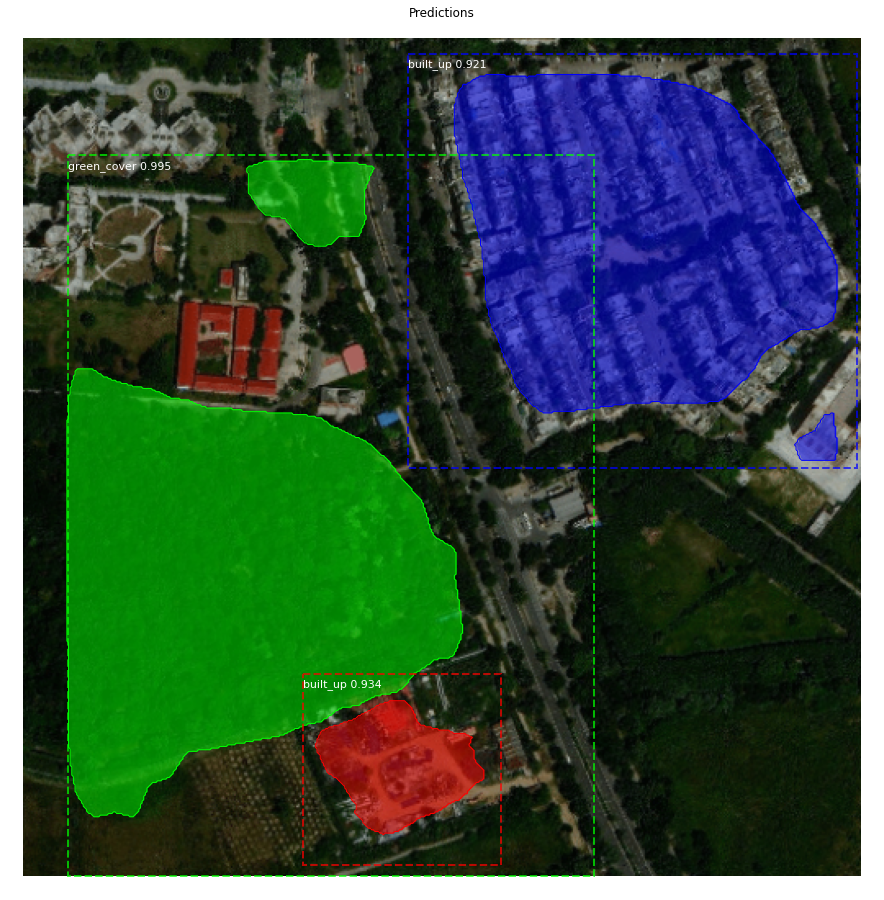

In [0]:
# DETECTION

# image_id = random.choice(dataset.image_ids)
print(dataset.image_ids)
img_ids = dataset.image_ids


image_id = 22
# image_id = i
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                      dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)
print("sdfsdf-----> ",results[0]['masks'].shape)


# Class id 2= Built up , class id 3= Green Cover


#Changes start from next line
print('\n MAIN Classes=\t',results[0]['class_ids'])
print('\n MAIN Scores=\t',results[0]['scores'])

#Code for removal of overlapping masks based on scores
if len(results[0]['scores']) > 1:
  scores = results[0]['scores'].tolist().copy()
  scores.sort(reverse=True)

  for i in range(1,len(scores)):
    curr_idx = results[0]['scores'].tolist().index(scores[i])
    for j in range(0,i):
      prev_idx = results[0]['scores'].tolist().index(scores[j])
      overlap_points = results[0]['masks'][:,:,prev_idx] == results[0]['masks'][:,:,curr_idx]
      results[0]['masks'][:,:,curr_idx][overlap_points] = False

#Code for calculation of probabilities of individual masks
probs = dict()
for k in range(results[0]['masks'].shape[2]):
  count=0
  total=0
  count+= (results[0]['masks'][:,:,k] == True).sum()
  print('Count of class',k,'is:',count)
  total = (results[0]['masks'].shape[0]*results[0]['masks'].shape[1])
  print(total)
  prob = count/total
  if results[0]['class_ids'][k] in probs:
    probs[results[0]['class_ids'][k]]+=prob
  else:
    probs[results[0]['class_ids'][k]] = prob

for key in probs:
  print('\n Prob of Class:',key,'=\t',probs[key])
#Changes end in the previous line

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)


In [1]:

import tensorflow as tf 
print(tf.__version__)

2.2.0


In [2]:
!pip3 install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 55kB/s 
     |████████████████████████████████| 3.2MB 25.5MB/s 
     |████████████████████████████████| 368kB 31.5MB/s 
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0


In [3]:
!pip3 install keras==2.1.0

     |████████████████████████████████| 307kB 3.4MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.0 which is incompatible.
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
